## Exploratory Data Analysis - Customer Segmentation

In [25]:
# Importing neccessary libraries 
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Load dataset

customers = pd.read_csv('data/raw_data.csv', encoding='iso-8859-1')


customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
# Descriptive statistics
print(customers[['Quantity', 'UnitPrice']].describe())

            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


In [18]:
# Data Cleaning

# Check for missing values
print(customers.isnull().sum())

# Drop duplicates
customers = customers.drop_duplicates()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


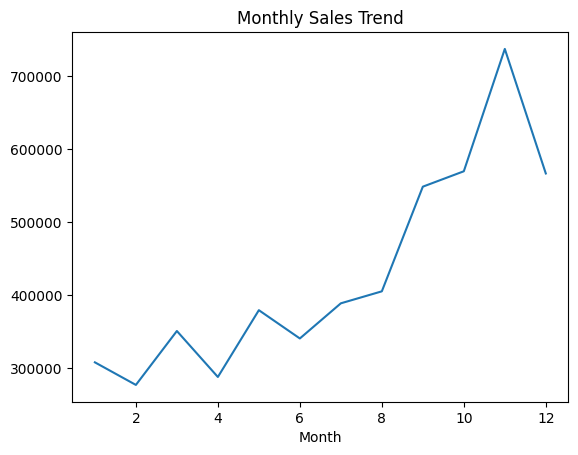

In [19]:
# Convert InvoiceDate to datetime
customers['InvoiceDate'] = pd.to_datetime(customers['InvoiceDate'])

# Extract date features
customers['Year'] = customers['InvoiceDate'].dt.year
customers['Month'] = customers['InvoiceDate'].dt.month
customers['Day'] = customers['InvoiceDate'].dt.day
customers['Hour'] = customers['InvoiceDate'].dt.hour

# Sales trend over time
monthly_sales = customers.groupby('Month')['Quantity'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.show()


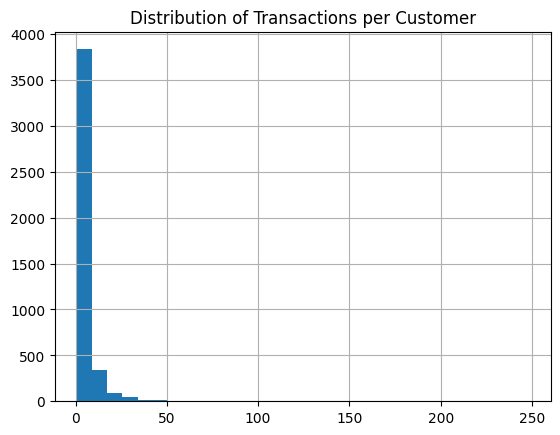

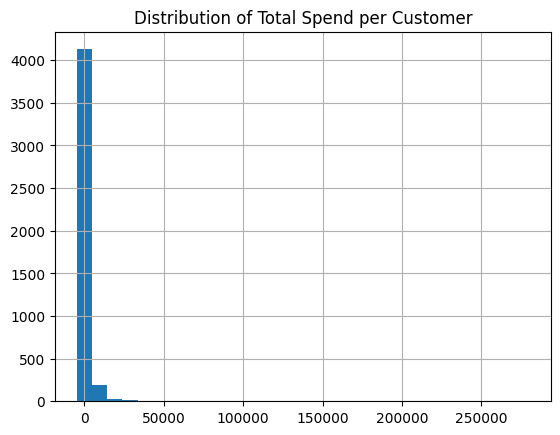

In [21]:
# Total transactions per customer
transactions_per_customer = customers.groupby('CustomerID')['InvoiceNo'].nunique()
transactions_per_customer.hist(bins=30)
plt.title('Distribution of Transactions per Customer')
plt.show()

# Total spend per customer
customers['TotalSpend'] = customers['Quantity'] * customers['UnitPrice']
spend_per_customer = customers.groupby('CustomerID')['TotalSpend'].sum()
spend_per_customer.hist(bins=30)
plt.title('Distribution of Total Spend per Customer')
plt.show()


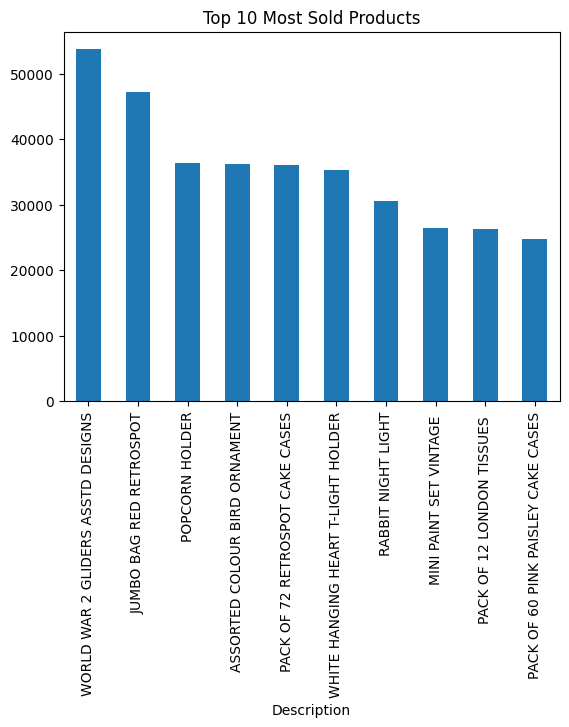

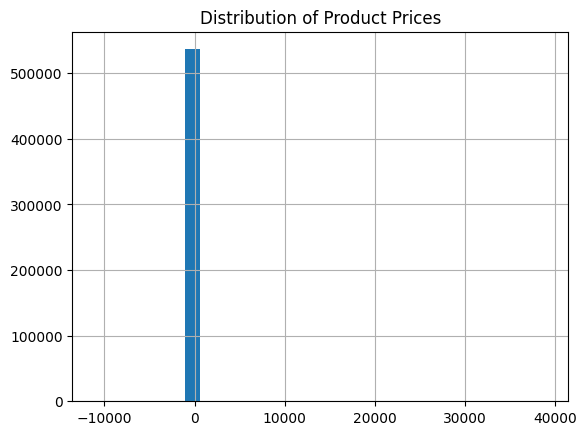

In [22]:
# Top 10 most sold products
top_products = customers.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Most Sold Products')
plt.show()

# Distribution of product prices
customers['UnitPrice'].hist(bins=30)
plt.title('Distribution of Product Prices')
plt.show()


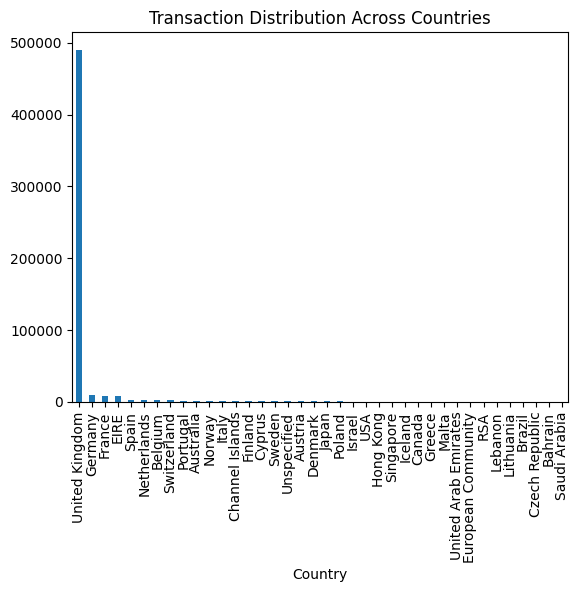

In [23]:
# Transaction distribution across countries
country_distribution = customers['Country'].value_counts()
country_distribution.plot(kind='bar')
plt.title('Transaction Distribution Across Countries')
plt.show()


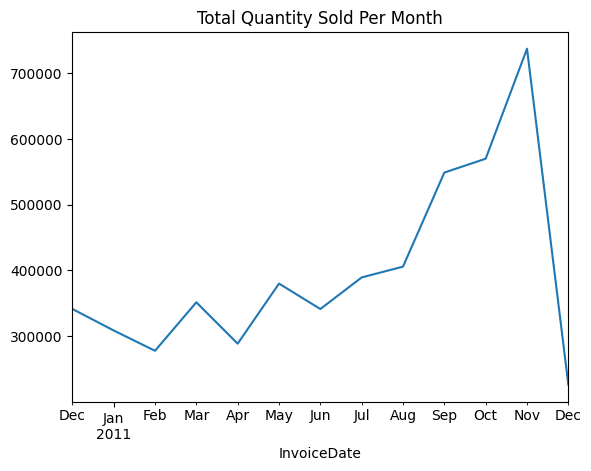

In [24]:
# Total Quantity sold per month
monthly_sales = customers.groupby(customers['InvoiceDate'].dt.to_period("M"))['Quantity'].sum()
monthly_sales.plot()
plt.title('Total Quantity Sold Per Month')
plt.show()


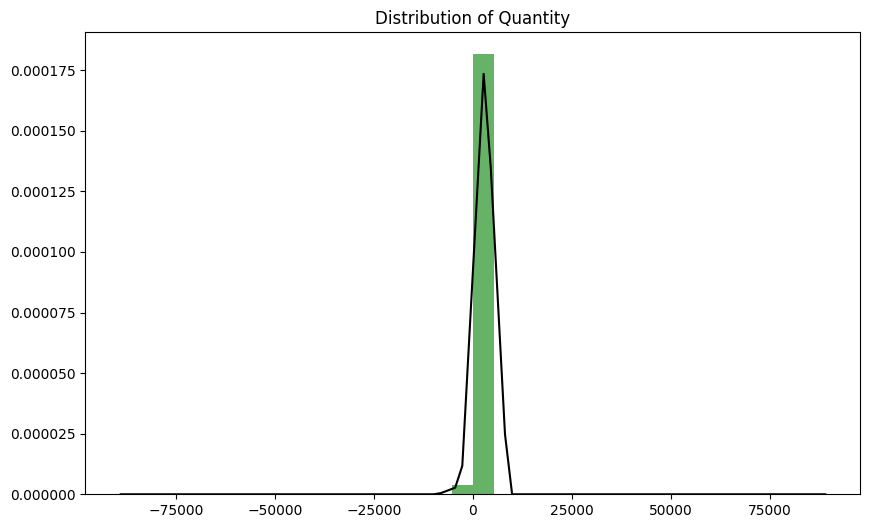

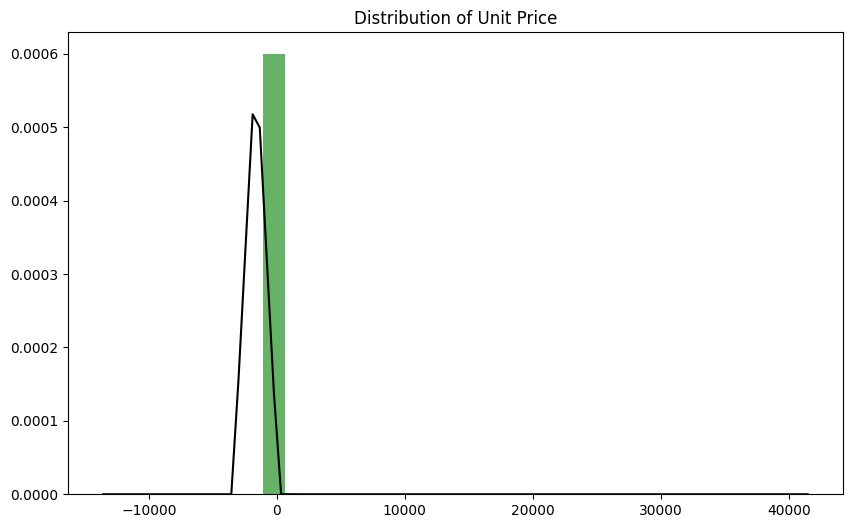

In [27]:
import numpy as np

# Histogram of Quantity
plt.figure(figsize=(10, 6))
plt.hist(customers['Quantity'], bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of Quantity')
# KDE Plot for Quantity
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.histogram(customers['Quantity'], bins=30, density=True)[0]
plt.plot(x, np.interp(x, (xmin + (xmax - xmin) * (np.arange(30) + 0.5) / 30), p), 'k')
plt.show()

# Histogram of UnitPrice
plt.figure(figsize=(10, 6))
plt.hist(customers['UnitPrice'], bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of Unit Price')
# KDE Plot for UnitPrice
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.histogram(customers['UnitPrice'], bins=30, density=True)[0]
plt.plot(x, np.interp(x, (xmin + (xmax - xmin) * (np.arange(30) + 0.5) / 30), p), 'k')
plt.show()


In [29]:
customers.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,2
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


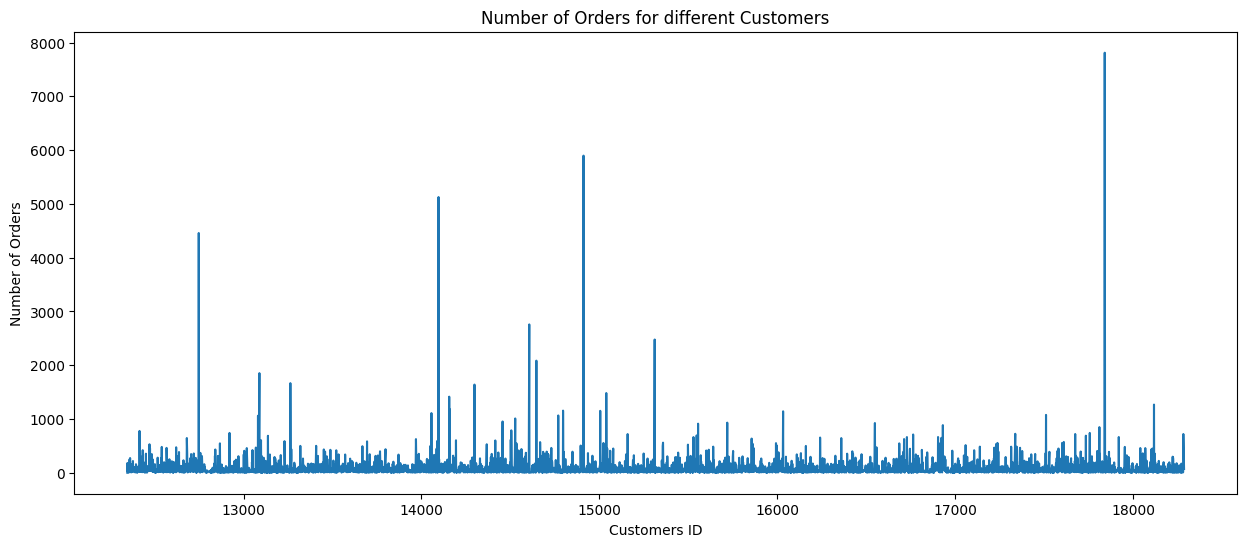

In [30]:
orders = customers.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

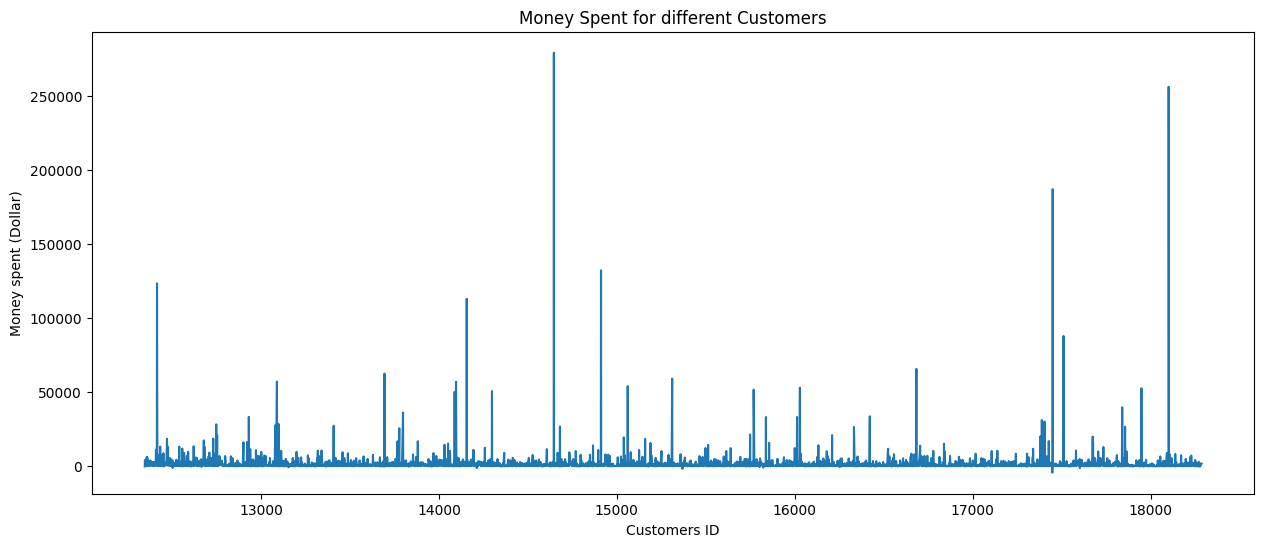

In [32]:
customers['amount_spent'] = customers['Quantity'] * customers['UnitPrice']

money_spent = customers.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()